## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
mousedata_combined = mouse_metadata.merge(study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mousedata_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Number of unique mice in the study.
mousedata_combined["Mouse ID"].nunique()


249

In [9]:
# Identify duplicates for Mouse ID and Timepoint. 
mousedata_duplicates = mousedata_combined[mousedata_combined.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
mousedata_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [18]:
mousedata_duplicates["Mouse ID"].nunique()

1

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse = mousedata_combined[mousedata_combined["Mouse ID"] == "g989"].index
mousedata_clean = mousedata_combined.drop(drop_mouse)
mousedata_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Verify that the number of mice in the clean DataFrame is one less than the combined dataframe.
mousedata_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.
drug_df = mousedata_clean.groupby(["Drug Regimen"])

#Summary Stats
mean = drug_df["Tumor Volume (mm3)"].mean()
median = drug_df["Tumor Volume (mm3)"].median()
variance = drug_df["Tumor Volume (mm3)"].var()
std = drug_df["Tumor Volume (mm3)"].std()
sem = drug_df["Tumor Volume (mm3)"].sem()

#Move summary stats into a new dataframe
drug_stats = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Std. Dev.":std,
    "SEM":sem
})

#Display new dataframe
drug_stats

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



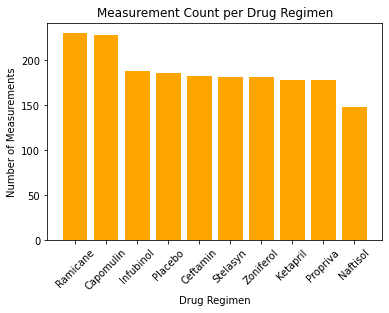

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug = mousedata_clean["Drug Regimen"].unique()
measurements = mousedata_clean["Drug Regimen"].value_counts()

plt.bar(drug, measurements, facecolor="orange",)
plt.title("Measurement Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



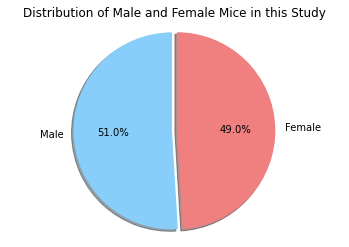

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mousedata_clean["Sex"].value_counts()
gender = ["Male", "Female"]
colors = ["lightskyblue", "lightcoral"]
explode = [0, 0.05]

plt.pie(mouse_gender, explode=explode, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Male and Female Mice in this Study")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
